In [989]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math
import numpy as np
import random

In [309]:
# method to read data from excel file
def read_plane_data(file_name):
    df_planes = pd.read_excel(file_name)
    return df_planes

df = read_plane_data('airplane data.xlsx')

print('Here are your plane choices:')
print(df['aircraft_type'])

Here are your plane choices:
0                        A220-300
1              Bombardier CRJ-900
2                Beechcraft 1900D
3            Boeing 737-300 (733)
4      Airbus A319 (319) Layout 1
5    Embraer E-175 (E75) Layout 1
6           Airbus A320-200 (320)
7         Boeing 737-700 Layout 2
8                ATR 72-600 (ATR)
9            Boeing 717-200 (717)
Name: aircraft_type, dtype: object


In [310]:
plane_choice = input("Input the number corresponding to the plane you'd like to simulate:")    

Input the number corresponding to the plane you'd like to simulate: 5


In [311]:
plane_type = df.loc[int(plane_choice)].at['aircraft_type']
print('You selected:', plane_type)

You selected: Embraer E-175 (E75) Layout 1


In [373]:
def seat_params_info(df, plane_num):
    """Function to gather information from table regarding seat dimensions and return a list of tuples."""
    seat_width_economy = df.loc[int(plane_num)].at['seat width - economy']
    seat_pitch_economy = df.loc[int(plane_num)].at['seat depth - economy']
    seat_param_economy = seat_width_economy, seat_pitch_economy

    seat_width_business = df.loc[int(plane_num)].at['seat width - business']
    seat_pitch_business = df.loc[int(plane_num)].at['seat depth - business']
    seat_param_business = seat_width_business, seat_pitch_business

    seat_width_1stclass = df.loc[int(plane_num)].at['seat width - first class']
    seat_pitch_1stclass = df.loc[int(plane_num)].at['seat depth - first class']
    seat_param_1stclass = seat_width_1stclass, seat_pitch_1stclass

    seat_params = [seat_param_economy, seat_param_business, seat_param_1stclass]

    return seat_params

seat_params_info(df, plane_choice)

[(18.25, 31), (18.25, 34.0), (20.0, 37.0)]

In [313]:
def num_of_seats_info(df, plane_num):
    """Function to gather information from table regarding number of seats and return a tuple."""
    econ = df.at[int(plane_num), "total seats - economy"]
    bus = df.at[int(plane_num), "total seats - business"]
    first = df.at[int(plane_num), "total seats - first class"]
    
    num_of_seats = econ, bus, first

    return num_of_seats

num_of_seats_info(df, plane_choice)

(76, 12.0, 12)

In [314]:
def seat_arrange_info(df, plane_num):
    """Function to gather information from table regarding seat arrangement and return a list."""
    seat_arrange_econ = df.loc[int(plane_num)].at['seat arrangement - economy']

    seat_arrange_bus = df.loc[int(plane_num)].at['seat arrangement - business']
    
    seat_arrange_1st = df.loc[int(plane_num)].at['seat arrangement - first class']
    
    seat_arrange = [seat_arrange_econ, seat_arrange_bus, seat_arrange_1st]

    return seat_arrange

seat_arrange_info(df, plane_choice)

['2 2', '2 2', '1 2']

In [1138]:
class Seat:
    def __init__(self, seat_label, class_type):
        self.seat_label = seat_label
        self.letter = seat_label[-1]
        self.row = int(seat_label[:-1])
        self.class_type = class_type
        self.occupied = False

In [1264]:
from Cell2D import Cell2D

class Plane:
    def __init__(self, seat_params, num_of_seats, seat_arrange):
        """
        Initializing seat dimensions, number of seats for each 'class' of plane, and the seat arrangement
        in each 'class' of the plane from the tuple or list passed to the __init__ method for each 
        corresponding characteristic of the plane.
        """
        # Store seat parameters (width, pitch) for each class
        self.seat_param_economy = seat_params[0]
        self.seat_param_business = seat_params[1]
        self.seat_param_firstclass = seat_params[2]

        # Store number of seats in each class
        self.num_of_seats_economy = num_of_seats[0]
        self.num_of_seats_business = num_of_seats[1]
        self.num_of_seats_firstclass = num_of_seats[2]

        # Store seat arrangement strings for each class
        self.seat_arrange_economy = seat_arrange[0]
        self.seat_arrange_business = seat_arrange[1]
        self.seat_arrange_firstclass = seat_arrange[2]

        self.seats = []

        self.setup_plane_geometry()

    def generate_seat_labels(self, starting_row, num_of_rows, seats_per_row):
        seat_labels = []
        for row in range(starting_row, num_of_rows + starting_row):
            for seat in range(seats_per_row):
                seat_letter = chr(64 + seats_per_row - seat)  # 'A', 'B', etc.
                seat_labels.append(f"{row}{seat_letter}")
        return seat_labels[::-1]

    def draw_sect_of_plane(self, ax, seat_type, starting_row, class_type):
        """
        Method to draw a section of the plane from the information passed to the method.
        The seat_type parameter is a tuple with the data stored as:
        (seats per column list, seats per row, number of rows, seat width, seat pitch)
        """
        seats_per_col, seats_per_row, num_of_rows, seat_width, leg_room, aisle_gap, start_y = seat_type
        leg_room -= seat_width
        seat_depth = 18*0.2  # Fixed depth of seat

        seat_labels = self.generate_seat_labels(starting_row, num_of_rows, seats_per_row)
        label_index = 0

        y = start_y  # Starting vertical position
        padding = 1
        
        for row in range(num_of_rows):
            x = 0  # Reset horizontal position for each row
            
            # Draw seats on the left side of the aisle
            for seat in range(seats_per_col[0]):
                rect = patches.Rectangle((x, y), seat_depth, seat_width, edgecolor='black', facecolor='lightskyblue')
                ax.add_patch(rect)
                label = seat_labels[label_index]
                ax.text(x + seat_depth / 2, y + seat_width / 2, label, ha='center', va='center', fontsize=6)
                self.seats.append(Seat(label, class_type))
                label_index += 1
                x += seat_depth + padding

            # Make aisle
            x += aisle_gap

            # Draw seats on the right side of the aisle
            for seat in range(seats_per_col[2]):
                rect = patches.Rectangle((x, y), seat_depth, seat_width, edgecolor='black', facecolor='lightskyblue')
                ax.add_patch(rect)
                label = seat_labels[label_index]
                ax.text(x + seat_depth / 2, y + seat_width / 2, label, ha='center', va='center', fontsize=6)
                self.seats.append(Seat(label, class_type))
                label_index += 1
                x += seat_depth + padding
            
            # Move to the next row
            y += leg_room + seat_width

    def draw_plane_find_parameters(self, seat_dims, seat_arrangement, num_of_seats):
        """
        This method extracts useful data to obtain:
        seats per column, seats per row, number of rows, seat width, and seat pitch.
        Returns a tuple to be passed as a parameter to draw_sect_of_plane.
        """
        seats_per_col = seat_arrangement.split(' ')  # Split arrangement string into list
            
        for i, num in enumerate(seats_per_col):
            seats_per_col[i] = int(num)  # Convert to integers

        dummy_var = seats_per_col[len(seats_per_col)//2]  # Extract center value
        seats_per_col[len(seats_per_col)//2] = 0  # Replace center value with 0
        seats_per_col.append(dummy_var)  # Append center value to the end

        seats_in_row = sum(seats_per_col)  # Total seats in a row
        num_of_rows = math.ceil(num_of_seats/seats_in_row)  # Calculate number of rows

        seat_width = seat_dims[0] * 0.2  # Scale seat width
        leg_room = seat_dims[1] * 0.2    # Scale seat pitch

        return seats_per_col, seats_in_row, num_of_rows, seat_width, leg_room

    def setup_plane_geometry(self):
        current_y = 0  # Starting from the top of the plane
    
        # --- First Class ---
        if self.num_of_seats_firstclass > 0:
            first_class = self.draw_plane_find_parameters(
                self.seat_param_firstclass, self.seat_arrange_firstclass, self.num_of_seats_firstclass
            )
            self.first_class_rows = first_class[2]
            self.first_pitch = first_class[4]
            self.first_class_start_y = current_y  # Starts at top
            current_y += self.first_class_rows * self.first_pitch
        else:
            self.first_class_rows = 0
            self.first_pitch = 0
            self.first_class_start_y = 0
    
        # --- Business Class ---
        if self.num_of_seats_business > 0:
            business_class = self.draw_plane_find_parameters(
                self.seat_param_business, self.seat_arrange_business, self.num_of_seats_business
            )
            self.business_class_rows = business_class[2]
            self.business_pitch = business_class[4]
            self.business_class_start_y = current_y  # Comes after first class
            current_y += self.business_class_rows * self.business_pitch
        else:
            self.business_class_rows = 0
            self.business_pitch = 0
            self.business_class_start_y = current_y
    
        # --- Economy Class ---
        economy_class = self.draw_plane_find_parameters(self.seat_param_economy, self.seat_arrange_economy, self.num_of_seats_economy)
        self.economy_rows = economy_class[2]
        self.economy_pitch = economy_class[4]
        self.economy_class_start_y = current_y
        current_y += self.economy_rows * self.economy_pitch
        self.plane_width = economy_class[3] * (economy_class[1] + 1) +5  # Estimate plane width

        # --- Final plane length ---
        self.plane_length = current_y

    def generate_seat_list(self):
        seats = []
        current_row = 1
    
        # First class
        if self.num_of_seats_firstclass > 0:
            first = self.draw_plane_find_parameters(self.seat_param_firstclass, self.seat_arrange_firstclass, self.num_of_seats_firstclass)
            seat_labels = self.generate_seat_labels(current_row, first[2], first[1])
            for label in seat_labels:
                seats.append(label)
            current_row += first[2]
    
        # Business class
        if self.num_of_seats_business > 0:
            business = self.draw_plane_find_parameters(self.seat_param_business, self.seat_arrange_business, self.num_of_seats_business)
            seat_labels = self.generate_seat_labels(current_row, business[2], business[1])
            for label in seat_labels:
                seats.append(label)
            current_row += business[2]
    
        # Economy class
        economy = self.draw_plane_find_parameters(self.seat_param_economy, self.seat_arrange_economy, self.num_of_seats_economy)
        seat_labels = self.generate_seat_labels(current_row, economy[2], economy[1])
        for label in seat_labels:
            seats.append(label)
        return seats
        
    def draw_plane(self):
        """
        This method calls other methods in the Plane class to gather the data needed
        to draw each class of the plane, and then draws each section.
        """
        fig, ax = plt.subplots()
        padding = 1
        
        econ_draw_inputs = None
        bus_draw_inputs = None
        first_draw_inputs = None

        econ_y = 0
        business_y = 0
        first_y = 0

        # Economy class section
        economy_class = self.draw_plane_find_parameters(self.seat_param_economy, self.seat_arrange_economy, self.num_of_seats_economy)
        econ_y = economy_class[2] * (economy_class[4])  # Update vertical position
        econ_extra_inputs = 5, 0
        econ_draw_inputs = economy_class + econ_extra_inputs
        total_rows = economy_class[2]

        # Business class section
        if self.num_of_seats_business > 0:
            business_class = self.draw_plane_find_parameters(self.seat_param_business, self.seat_arrange_business, self.num_of_seats_business)
            fixer = 0
            if business_class[1] != economy_class[1]:  # Align business class with economy if needed
                fixer = (economy_class[1] - business_class[1]) * (18*0.2 - padding)
            business_width = business_class[3] * (business_class[1] + padding)
            business_aisle_width = self.plane_width - business_width + fixer
            bus_extra_inputs = business_aisle_width, econ_y
            bus_draw_inputs = business_class + bus_extra_inputs
            total_rows += business_class[2]
            business_y = econ_y + business_class[2] * (business_class[4])
            
        # First class section        
        if self.num_of_seats_firstclass > 0:
            first_class = self.draw_plane_find_parameters(self.seat_param_firstclass, self.seat_arrange_firstclass, self.num_of_seats_firstclass)
            fixer = 0
            if first_class[1] != economy_class[1]:  # Align first class with economy if needed
                fixer = (economy_class[1] - first_class[1]) * (18*0.2 - padding)
            first_class_width = first_class[3] * (first_class[1] + padding)
            first_class_aisle_width = self.plane_width - first_class_width + fixer
            total_rows += first_class[2]
            if business_y == 0:
                first_extra_inputs = first_class_aisle_width, econ_y
                first_draw_inputs = first_class + first_extra_inputs
            else:
                first_extra_inputs = first_class_aisle_width, business_y
                first_draw_inputs = first_class + first_extra_inputs
            
            first_y = business_y + first_class[2] * (first_class[4])

        # generate seat labels
        starting_row = 1
        if self.num_of_seats_firstclass > 0:
            self.draw_sect_of_plane(ax, first_draw_inputs, starting_row, "first class")
            starting_row += first_class[2]

        if self.num_of_seats_business > 0:
            self.draw_sect_of_plane(ax, bus_draw_inputs, starting_row, "business class")
            starting_row += business_class[2]
            
        self.draw_sect_of_plane(ax, econ_draw_inputs, starting_row, "economy class")

        return fig, ax

In [1266]:
class Passenger:
    def __init__(self, seat_label, current_row_location, y_loc):
        self.seat_label = seat_label               # e.g., '13B'
        self.row = int(seat_label[:-1])            # e.g., 13
        self.letter = seat_label[-1]               # e.g., 'B'
        self.current_row_location = current_row_location # y-position in aisle
        self.y_loc = y_loc
        self.row_target_y = None                   # will be set later based on seat location
        self.speed = None                              # default — will be updated to match seat pitch
        self.status = "not seated"

In [1272]:
class PlaneBoarding(Cell2D):
    def __init__(self, num_of_passengers, plane, constructor=Passenger):
        self.plane = plane
        self.passengers = []
        
        if self.plane.num_of_seats_firstclass > 0:
            largest_pitch = self.plane.first_pitch
        elif self.plane.num_of_seats_business > 0:
            largest_pitch = self.plane.business_pitch
        else:
            largest_pitch = self.plane.economy_pitch

        seats = self.plane.generate_seat_list()
        booked_seats = random.sample(seats, num_of_passengers)
        
        # Create start positions just outside the plane
        seat_locations = [-i for i in range(num_of_passengers)]
        start_positions = [self.plane.plane_length + (-seat) * largest_pitch for seat in seat_locations]
        self.passengers = [constructor(seat, loc, pos) for seat, loc, pos in zip(booked_seats, seat_locations, start_positions)]

    def find_coords(self, passengers):
        economy_class = self.plane.draw_plane_find_parameters(self.plane.seat_param_economy, self.plane.seat_arrange_economy, 
                                                              self.plane.num_of_seats_economy)
        
        x_aisle_coord = np.full(len(passengers), (economy_class[3] * (economy_class[1] + 1) +5)/2)
        y_coords = np.array([(passenger.y_loc) for passenger in passengers])
        
        return x_aisle_coord, y_coords
    
    def step(self):
        positions_before = [p.current_row_location for p in self.passengers]
    
        for i, passenger in enumerate(self.passengers):
            previous_position = positions_before[i - 1] if i > 0 else None
            previous_status = self.passengers[i - 1].status if i > 0 else None
            previous_speed = self.passengers[i - 1].speed if i > 0 else None
    
            self.move(passenger, previous_position, previous_status, previous_speed)

    def move(self, passenger, prev_position, prev_status, prev_speed):
        if passenger.status == "not seated":
            if passenger.current_row_location < passenger.row:
                can_move = False
            
                if prev_position is None:  # No one in front
                    can_move = True
                elif prev_speed != 0:
                    can_move = True
                elif prev_speed == 0 and prev_status == "seated":
                    can_move = True
    
                if can_move:
                    # change speed based on location in plane so move one seat forward each time
                    if passenger.current_row_location <= self.plane.first_class_rows and self.plane.first_class_rows != 0:
                        passenger.speed = self.plane.first_pitch
                    elif passenger.current_row_location <= self.plane.business_class_rows and self.plane.business_class_rows != 0:
                        passenger.speed = self.plane.business_pitch
                    else:
                        passenger.speed = self.plane.economy_pitch
                    
                    passenger.y_loc -= passenger.speed
                    passenger.current_row_location += 1
    
            elif passenger.current_row_location == passenger.row:
                passenger.speed = 0
                passenger.status = "seated"
                # ADD!!!! check if other people are in the row and have to get out for you to get to your seat
                        # move side ways by number of seats from aisle + 18*0.2/2
    
    def draw(self):
        fig, ax = self.plane.draw_plane()
        x_coords, y_coords = self.find_coords(self.passengers)

        for x, y in zip(x_coords, y_coords):
            person = patches.Circle((x, y), radius=6 * 0.2, edgecolor='black', facecolor='salmon')
            ax.add_patch(person)

        fig.set_size_inches((self.plane.plane_width + 5) * 0.1, (self.plane.plane_length + 20) * 0.1)

        ax.set_xlim(0, self.plane.plane_width + 5)
        ax.set_ylim(0, self.plane.plane_length + 20)  
        ax.set_aspect('equal')
        ax.set_autoscale_on(False)

        plt.axis('equal')
        plt.axis('off')
        plt.show()

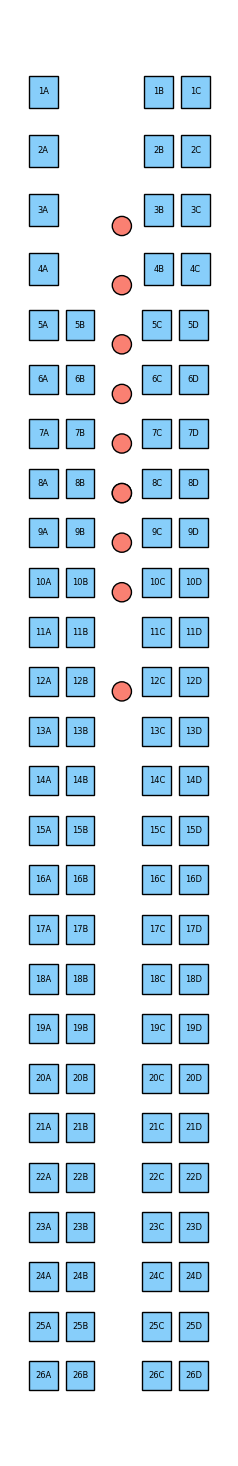

In [1274]:
plane = Plane(seat_params_info(df, plane_choice), num_of_seats_info(df, plane_choice), seat_arrange_info(df, plane_choice))

plane_boarding = PlaneBoarding(10, plane, Passenger)
plane_boarding.animate(frames = 13, interval = 0.5)